In [1]:
from keras.datasets import reuters
#로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen 상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000,test_split=0.2)

In [2]:
from tensorflow.keras.preprocessing import sequence
# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from keras.utils import np_utils
#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
model = Sequential()
#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력
#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=3)
hist=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 3s 21ms/step - loss: 2.7261 - accuracy: 0.3438 - val_loss: 2.4062 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 12ms/step - loss: 2.2902 - accuracy: 0.3943 - val_loss: 2.0547 - val_accuracy: 0.4886
Epoch 3/100
57/57 [==============================] - 1s 12ms/step - loss: 1.9613 - accuracy: 0.4956 - val_loss: 1.8574 - val_accuracy: 0.5242
Epoch 4/100
57/57 [==============================] - 1s 12ms/step - loss: 1.8103 - accuracy: 0.5283 - val_loss: 1.7740 - val_accuracy: 0.5309
Epoch 5/100
57/57 [==============================] - 1s 11ms/step - loss: 1.7143 - accuracy: 0.5478 - val_loss: 1.7777 - val_accuracy: 0.5470
Epoch 6/100
57/57 [==============================] - 1s 11ms/step - loss: 1.6563 - accuracy: 0.5690 - val_loss: 1.6699 - val_accuracy: 0.5626
Epoch 7/100
57/57 [==============================] - 1s 12ms/step - loss: 1.5844 - accuracy: 0.5925 - val_loss: 1.6129 - val_accuracy: 0.5927
Epoch 

In [6]:
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test) [1]))

71/71 [==============================] - 0s 3ms/step - loss: 1.4714 - accuracy: 0.6362

 정확도 : 0.6362


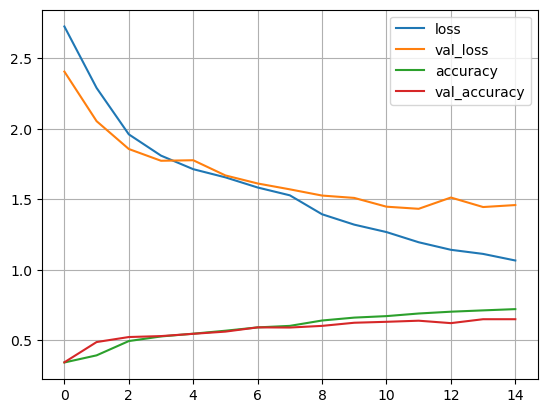

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [10]:
import numpy as np
pred=model.predict(X_test)
np.argmax(pred[12])

71/71 [==============================] - 0s 5ms/step


1

In [11]:
np.argmax(y_test[12])

1